In [1]:
from luxai_s2.env import LuxAI_S2
from luxai_s2.map.board import Board
from luxai_s2.map_generator.generator import GameMap
import matplotlib.pyplot as plt
import matplotlib
import logging
import numpy as np
from luxai_s2.utils import my_turn_to_place_factory
from agents_experiments import (reset_w_custom_board, IdleAgent, ControlledAgent, interact)
from plots import plot_factory_stats
import uuid
from IPython.display import Video
from pprint import pprint
from robots import CartesianPoint
import pandas as pd
# import seaborn as sns

matplotlib.rc('font', size=14)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [2]:
# key-values of dict below should match attributes present in this class
# https://github.com/aernesto/Lux-Design-S2/blob/adrian/luxai_s2/luxai_s2/config.py#L34
environment_config = dict(
#         max_episode_length=350,  # how many total turns in game
#         CYCLE_LENGTH=50,
#         DAY_LENGTH=50,  # so no night
        MAX_RUBBLE=0,  # disable rubble   
        MIN_FACTORIES=2,  
        MAX_FACTORIES=2
    )
env = LuxAI_S2(**environment_config)
custom_rubble = np.zeros((env.env_cfg.map_size,) * 2, dtype=np.int64)

# Let's put a single ice at 30,30
custom_ice = np.zeros_like(custom_rubble)
custom_ice[30, 30] = 1

# Let's put a single ore at 21, 21
custom_ore = np.zeros_like(custom_rubble)
custom_ore[21, 21] = 1

custom_symmetry = None


custom_map_ = GameMap(custom_rubble, custom_ice, custom_ore, custom_symmetry)

simple_board = Board(
    seed=env.seed_rng.randint(0, 2**32 - 1, dtype=np.int64), 
    env_cfg=env.env_cfg,
    existing_map=custom_map_
)

obs, env = reset_w_custom_board(env, seed=41, custom_board=simple_board)
    
# source code of reset() method: 
# https://github.com/aernesto/Lux-Design-S2/blob/adrian/luxai_s2/luxai_s2/env.py#L175
# obs = env.reset(seed=41) # resets an environment with a seed

In [3]:
# first player cannot place factory on any boundary, so inner square has dimensions 46x46
# the 2 isolated resources remove each 9 tiles from the potential spawn locations
46*46- 9*2

2098

In [4]:
2098 -28

2070

In [5]:
logger.setLevel(logging.DEBUG)

filename = str(uuid.uuid4()) + '.mp4'
file_path = '/home/adrian_admin/prog/kaggle/lux-ai-2/Lux-Design-S2/data/experiments/adrian/'
animate_arg = file_path + filename

agents = {}
for player, agent_constructor in zip(env.agents, [IdleAgent, ControlledAgent]):
    logging.debug(player)
    agents[player] = agent_constructor(player, env.state.env_cfg) 
    
last_obs = interact(
    env, 
    agents, 
    500, 
    animate_=animate_arg, 
    break_at_first_action=False, 
    debug=False, 
    custom_board=simple_board
)
# print(last_obs)

DEBUG:root:player_0
DEBUG:root:player_1
DEBUG:root:{x: 30, y: 30}
DEBUG:root:--logging from ControlledAgent.get_ice()
DEBUG:root:robot_id=unit_4
DEBUG:root:ice_pos={x: 30, y: 30}
DEBUG:root:unassigned_ice={x: 30, y: 30}
DEBUG:root:ice_assignment={'unit_4': x: 30, y: 30}
DEBUG:root:--END from ControlledAgent.get_ice()
DEBUG:root:--debug from RobotEnacter.ice_cycle
DEBUG:root:robot pos=x: 1, y: 1 ice_loc=x: 30, y: 30
DEBUG:root:go path=[array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0, 1]), array([0, 3, 0, 1, 0,

In [6]:
Video(animate_arg, embed=True)

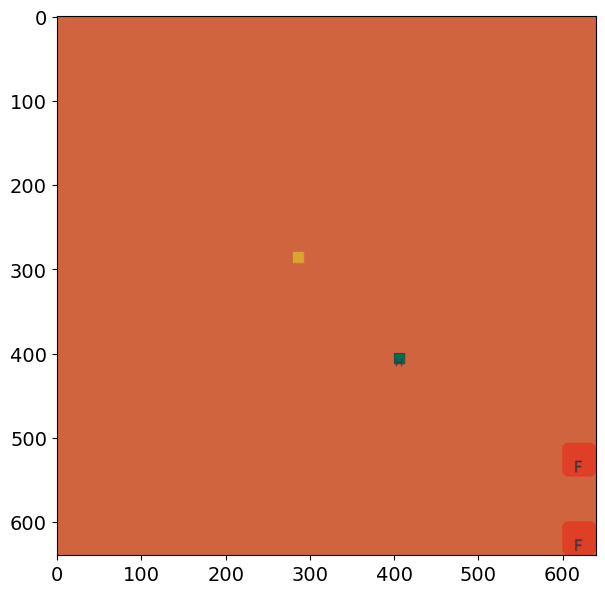

In [7]:
#video above is missing bottom pixels for some reason 
logger.setLevel(logging.INFO)
img = env.render("rgb_array", width=640, height=640)
f, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img);

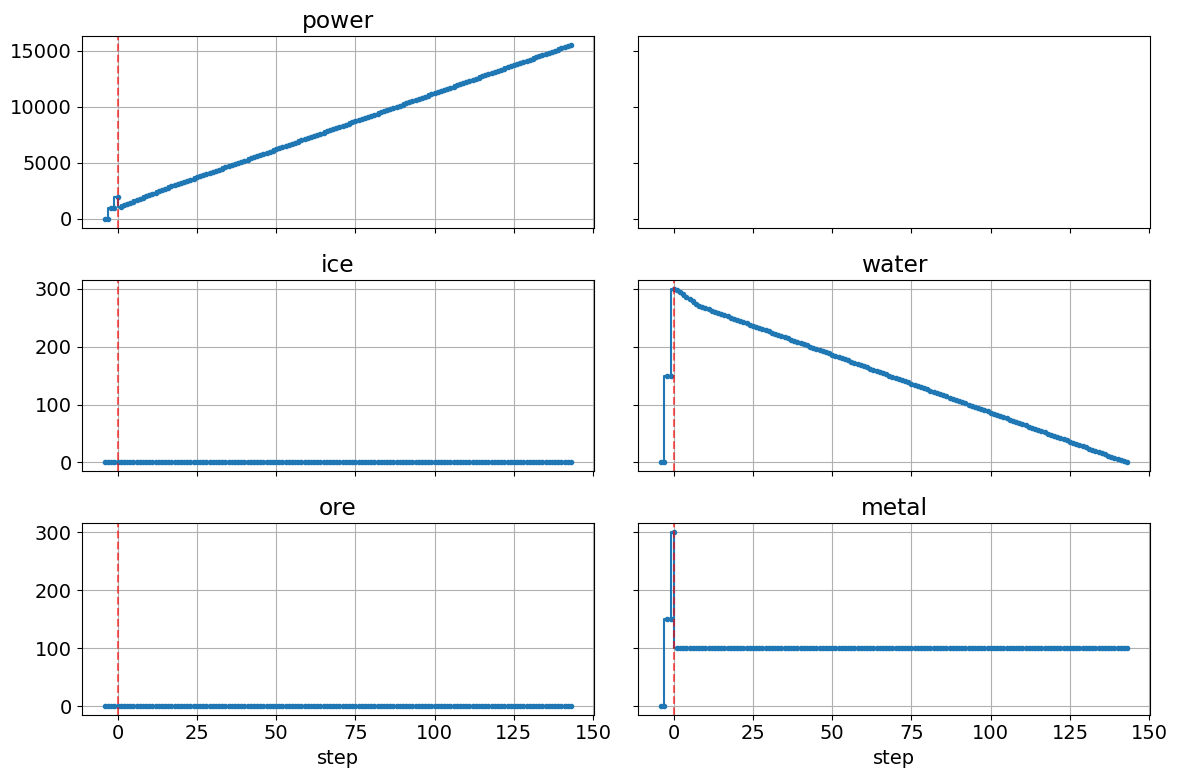

In [8]:
plot_factory_stats(agents['player_1'].stats);